# 1. KNN分类模型转化回归模型

In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
# X_train是样本特征,y_train是样本标签
X_train = np.array([
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 3.3],
    [2, 9],
    [5, 7.5],
    [7.2, 4 ],
    [8.1, 8],
    [9, 2.5]
])
y_train = np.array([0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7])
data_new = np.array([4,5])

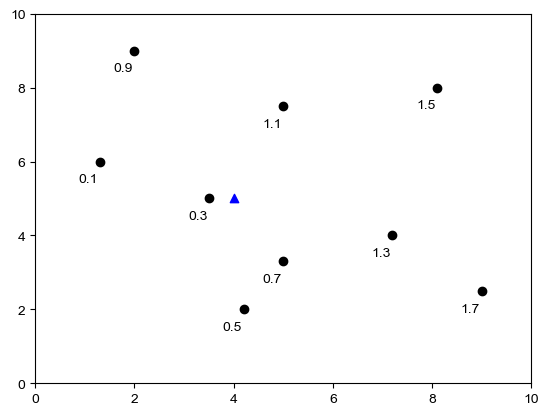

In [209]:
plt.scatter(X_train[:,0], X_train[:,1], color='black') # 绘制所有训练样本点，黑色圆点表示
plt.scatter(data_new[0], data_new[1], color='b', marker='^') # 绘制待预测的新数据点，蓝色三角形表示
# 为每个训练样本点添加标签注释
for i in range(len(y_train)):
    # annotate函数用于添加文本注释
    # text：要显示的文本内容（即该点的标签值）, xy：注释指向的点的坐标 , xytext：注释文本相对于点的偏移量
    # textcoords='offset points'：指定偏移量的单位为点（points）
    plt.annotate(text=y_train[i], xy=X_train[i], xytext=(-15,-15), textcoords='offset points')

# 设置坐标轴范围，留出足够空间显示注释
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show() # 显示图形

In [210]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in X_train]
sort_index = np.argsort(distances)

In [211]:
k = 5
first_k =  [y_train[i] for i in sort_index[:k]]
print("前{}个最近邻的标签值为：{}".format(k, first_k))

前5个最近邻的标签值为：[np.float64(0.3), np.float64(0.7), np.float64(1.1), np.float64(0.1), np.float64(0.5)]


In [212]:
# 计算前k个最近邻的标签值的平均值,就是蓝色点的预测值
predict_y = np.mean(first_k)
predict_y

np.float64(0.54)

# 2. KNN回归 Scikit learn 实现

In [213]:
from sklearn.neighbors import KNeighborsRegressor

In [214]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [215]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [216]:
predict_y = knn_reg.predict(data_new.reshape(1,-1))
predict_y

array([0.54])

# 3. 使用 bosun 数据集 验证KNN回归模型
- 数据来源：1978 年收集的波士顿地区房价数据，曾被纳入 scikit-learn。
- 数据特征：506 个样本，13 个特征（如犯罪率、房间数、师生比等），目标变量为房价中位数。
- 数据用途：用于回归模型验证，分析城市环境因素对房价的影响。
- 注意：因含敏感变量已被 scikit-learn 移除，所以需要使用其他包获取


In [217]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd


In [218]:
# 1. 加载波士顿房价数据集(skilearn删除了bosun数据,所以加载本地数据)
df = pd.read_csv("Boston.csv")

In [219]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [220]:
X = df.drop("medv", axis=1)  # 特征
y = df["medv"]               # 目标变量（房价中位数）

In [221]:
x_train ,x_test, y_train, y_test = train_test_split(X, y ,train_size = 0.7, random_state=233)

In [222]:
from sklearn.neighbors import KNeighborsRegressor

In [223]:
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)

In [224]:
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(weights='distance')

score这里是计算模型的 R² (coefficient of determination) 分数，而不是直接判断预测值与实际值相等的个数

1. R² 分数公式：
$R² = 1 - (Σ(y_test - y_predicted)² / Σ(y_test - y_test_mean)²)$
)
- 分子：预测值与实际值差值的平方和
- 分母：实际值与测试集均值差值的平方和
- 结果：
    - R² = 1：模型预测完全准确(结果越趋近于1,越准确)
    - R² = 0：模型预测效果与简单的均值预测相同
    - R² < 0：模型预测效果比均值预测还差
2. 误差衡量：
* knn_reg.predict(x_test) 生成预测值
* 计算预测值与实际值的误差平方和
* 将误差平方和与实际值与均值的平方和进行比较，得出 R² 分数。
3. 总结：
* knn_reg.score(x_test, y_test) 通过 R² 分数衡量模型对数据的拟合程度，误差越小，R² 越接近 1

In [225]:
knn_reg.score(x_test, y_test)

0.49308828546554706

In [226]:
knn_reg.predict(x_test)[:5],y_test[:5]

(array([12.82952298,  9.9587803 , 10.02307407, 13.7410931 , 23.97899044]),
 426    10.2
 375    15.0
 445    11.8
 397     8.5
 174    22.6
 Name: medv, dtype: float64)

可以看到预测结果准确度很低,就是因为没有做归一化

In [227]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = knn_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"均方误差(MSE): {mse:.4f}")
print(f"均方根误差(RMSE): {rmse:.4f}")
print(f"决定系数(R²): {r2:.4f}")

均方误差(MSE): 42.7732
均方根误差(RMSE): 6.5401
决定系数(R²): 0.4931


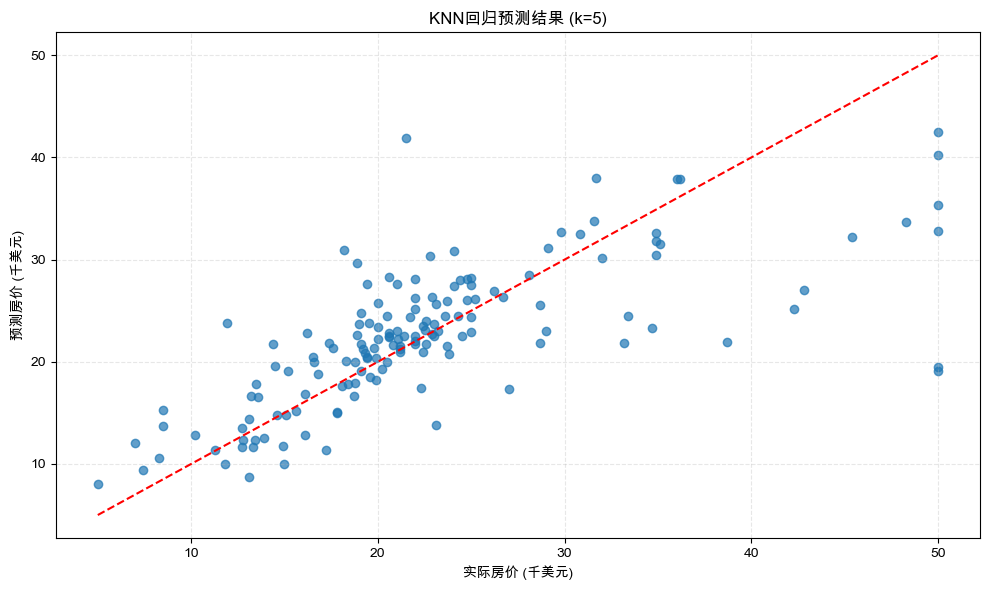

In [228]:
# 设置matplotlib正常显示中文和负号
plt.rcParams['font.family'] = 'sans-serif'  # 使用系统默认字体
# 设置字体为黑体, 'STHeitiSC-Light'是系统自带字体，'SimHei'是常见中文字体，'Arial Unicode MS'是支持更广泛Unicode字符的字体
plt.rcParams['font.sans-serif'] = ['STHeitiSC-Light', 'SimHei', 'Arial Unicode MS']  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 5. 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际房价 (千美元)')
plt.ylabel('预测房价 (千美元)')
plt.title(f'KNN回归预测结果 (k={k})')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 归一化

In [229]:
from sklearn.preprocessing import StandardScaler

In [230]:
standardScaler = StandardScaler()

In [231]:
standardScaler.fit(x_train)

StandardScaler()

In [232]:
x_train = standardScaler.transform(x_train)

In [233]:
x_test = standardScaler.transform(x_test)

In [234]:
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(weights='distance')

In [235]:
knn_reg.score(x_test, y_test)

0.8315777292735131

In [236]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = knn_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"均方误差(MSE): {mse:.4f}")
print(f"均方根误差(RMSE): {rmse:.4f}")
print(f"决定系数(R²): {r2:.4f}")

均方误差(MSE): 14.2115
均方根误差(RMSE): 3.7698
决定系数(R²): 0.8316


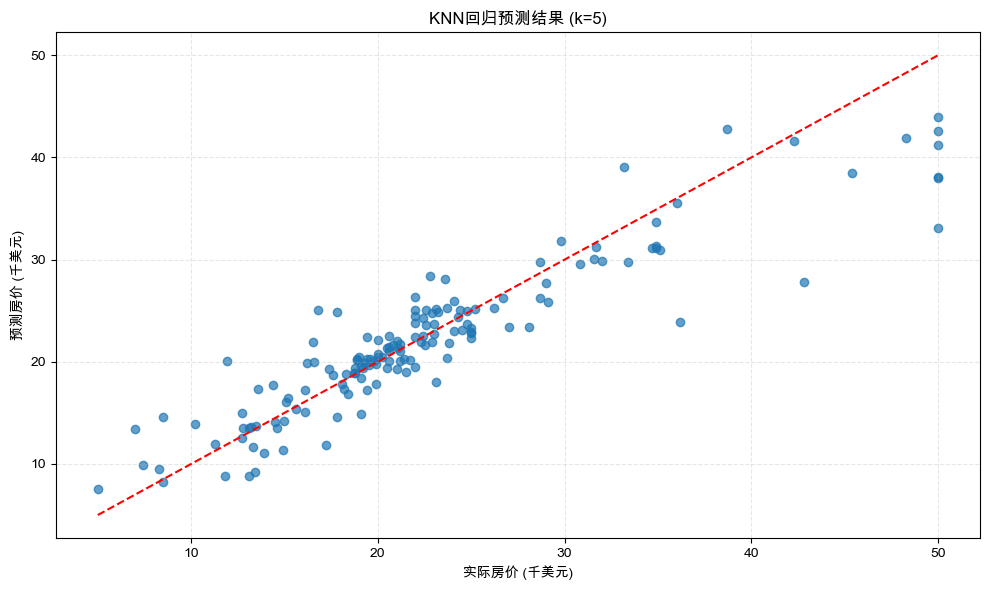

In [237]:
# 5. 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际房价 (千美元)')
plt.ylabel('预测房价 (千美元)')
plt.title(f'KNN回归预测结果 (k={k})')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. 超参数搜索 寻找最佳超参数

In [243]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': [n for n in range(1, 20)],   # - n_neighbors: 1到19的K值
    'weights': ['uniform', 'distance'],         # - weights: 'uniform'或'distance'权重选项
    'p': [p for p in range(1, 7)]               # - p: 1到6的距离度量参数(1:曼哈顿距离, 2:欧氏距离, >2:闵可夫斯基距离)
}
grid = GridSearchCV(
    estimator=KNeighborsRegressor(), # 创建KNN分类器实例作为基础分类器
    param_grid=params, # 定义需要搜索的参数网格    
    n_jobs=-1 # n_jobs=-1表示使用所有可用的CPU核心进行并行计算,可以加快网格搜索的速度
)
# 执行网格搜索来找到最佳超参数组合
# grid对象在之前已经通过GridSearchCV创建，包含了所需搜索的参数网格
# x_train和y_train是训练数据和对应的标签
# fit方法会遍历所有可能的参数组合，对每组参数训练模型并评估性能
# fit 方法在 GridSearchCV 中通过交叉验证（Cross-Validation）来评估模型性能并选择最佳超参数。
# 训练集和测试集的选取
# 在 GridSearchCV 中，测试集通过交叉验证的方式从 x_train 和 y_train 中动态划分。具体步骤如下：
    # 1. 将 x_train 和 y_train 分成 k 份），默认值为 cv=5，即分成 5 份
    # 2. 每次从 k 份中选取 1 个作为验证集，其余 k-1 个作为训练集
    # 3. 对每组超参数组合，重复上述过程 k 次，计算每次验证集的性能得分
grid.fit(x_train, y_train)
grid.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [ ]:
# 使用最佳超参数值重新训练模型
best_knn = KNeighborsRegressor(n_neighbors=grid.best_params_['n_neighbors'],
                               weights=grid.best_params_['weights'],
                               p=grid.best_params_['p'])
best_knn.fit(x_train, y_train)

# 4. 模型评估
y_pred = best_knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"均方误差(MSE): {mse:.4f}")
print(f"均方根误差(RMSE): {rmse:.4f}")
print(f"决定系数(R²): {r2:.4f}")

# R²提升了2个百分点,还是很不错的呀


均方误差(MSE): 12.6477
均方根误差(RMSE): 3.5564
决定系数(R²): 0.8501
